In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df["Reviews"].value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: count, Length: 6002, dtype: int64

In [6]:
df_copy=df

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# df_copy["Reviews"]=df_copy["Reviews"].astype(int)

In [9]:
df_copy["Reviews"].str.isnumeric().sum()

10840

In [10]:
df.shape

(10841, 13)

In [11]:
df_copy[~df_copy["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df_copy=df_copy.drop(df_copy.index[10472])

In [13]:
df_copy.shape


(10840, 13)

In [14]:
df_copy["Reviews"]=df_copy["Reviews"].astype('int')

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [16]:
df_copy["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
df_copy["Size"]=df_copy["Size"].str.replace("M","000")
df_copy["Size"]=df_copy["Size"].str.replace("k","")
df_copy["Size"]=df_copy["Size"].replace("Varies with device",np.nan)
df_copy["Size"]=df_copy["Size"].astype(float)

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [19]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [20]:
df_copy["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [21]:
remove=[",","$","+"]
cols_toclean=["Installs","Price"]
for items in remove:
    for cols in cols_toclean:
        df_copy[cols]= df_copy[cols].str.replace(items,"")

In [22]:
df_copy["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [23]:
df_copy["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [24]:
df_copy["Installs"]=df_copy["Installs"].astype(float)
df_copy["Price"]=df_copy["Price"].astype(float)

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int32(1), object(8)
memory usage: 1.1+ MB


In [26]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
df_copy["Last Updated"]=pd.to_datetime(df_copy["Last Updated"])
df_copy["Day"]=df_copy["Last Updated"].dt.day
df_copy["Month"]=df_copy["Last Updated"].dt.month
df_copy["Year"]=df_copy["Last Updated"].dt.year

In [28]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [29]:
df_copy[df_copy["App"].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000.0,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000.0,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000.0,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000.0,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000.0,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000.0,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000.0,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [30]:
df_copy[df_copy["App"].duplicated()].shape

(1181, 16)

## Let's drop the duplicate rows

In [31]:
df_copy=df_copy.drop_duplicates(subset=["App"],keep="first")

In [32]:
df_copy


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [33]:
df_copy[df_copy["App"].duplicated()].shape

(0, 16)

In [34]:
numeric=[x for x in df_copy.columns if df_copy[x].dtype != "O" ]
categorical=[x for x in df_copy.columns if df_copy[x].dtype == "O" ]

In [35]:
numeric

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'Day',
 'Month',
 'Year']

In [36]:
print("We have {} numerical features:{}".format(len(numeric),numeric))
print("We have {} categorical features:{}".format(len(categorical),categorical))


We have 9 numerical features:['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features:['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## Let's Start Data Visualization!!!

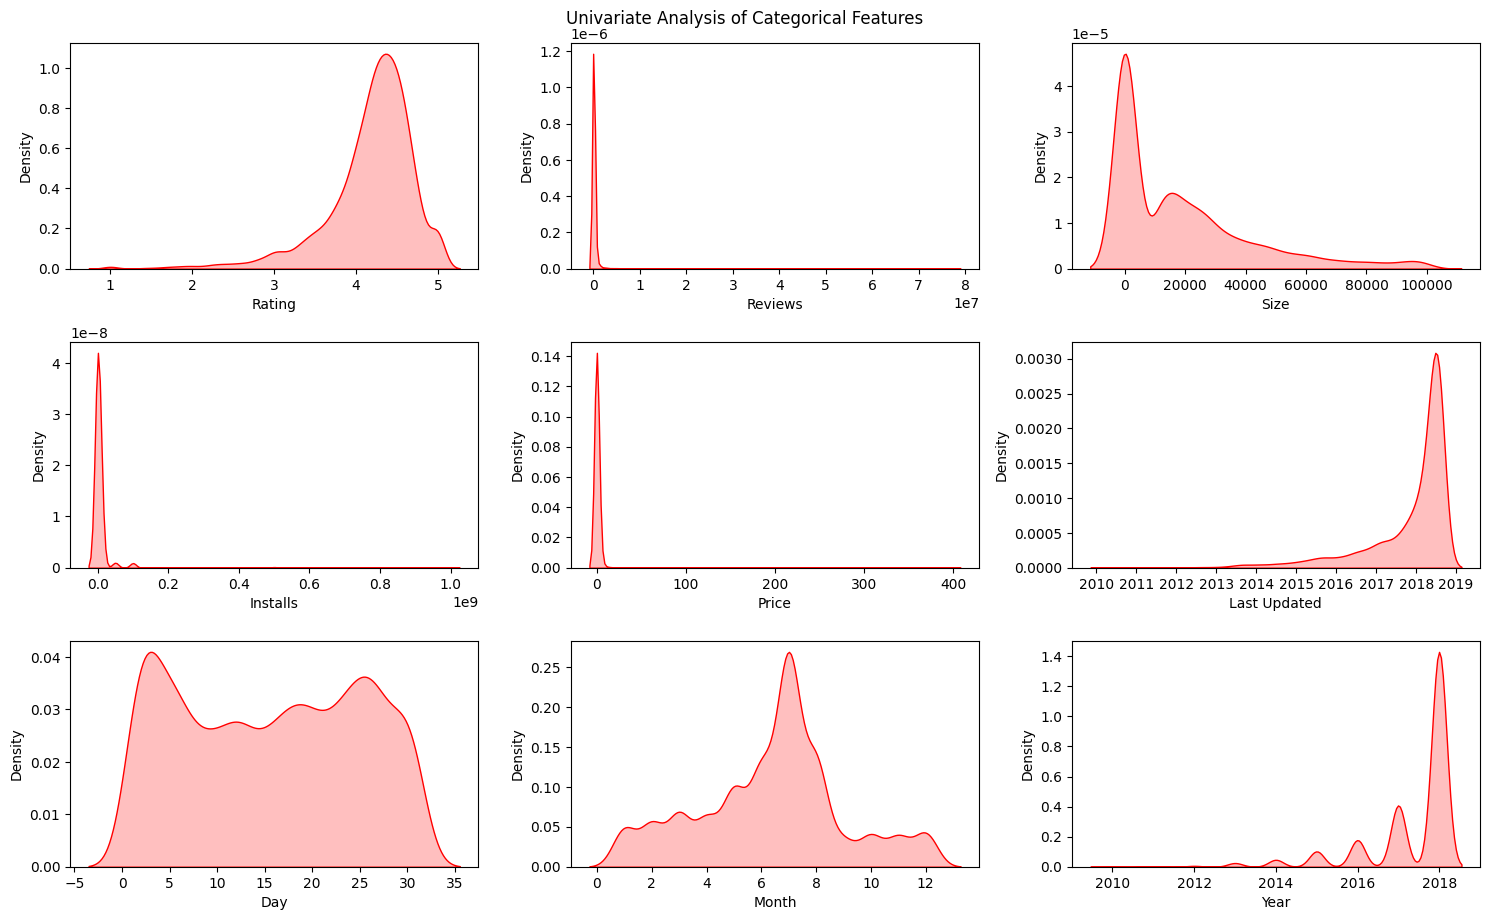

In [37]:
plt.figure(figsize=[15,15])
plt.suptitle("Univariate Analysis of Categorical Features")
# category = ['Category', 'Type']
for i in range(0,len(numeric)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric[i]],shade=True,color='r')
    plt.xlabel(numeric[i])
    plt.tight_layout()

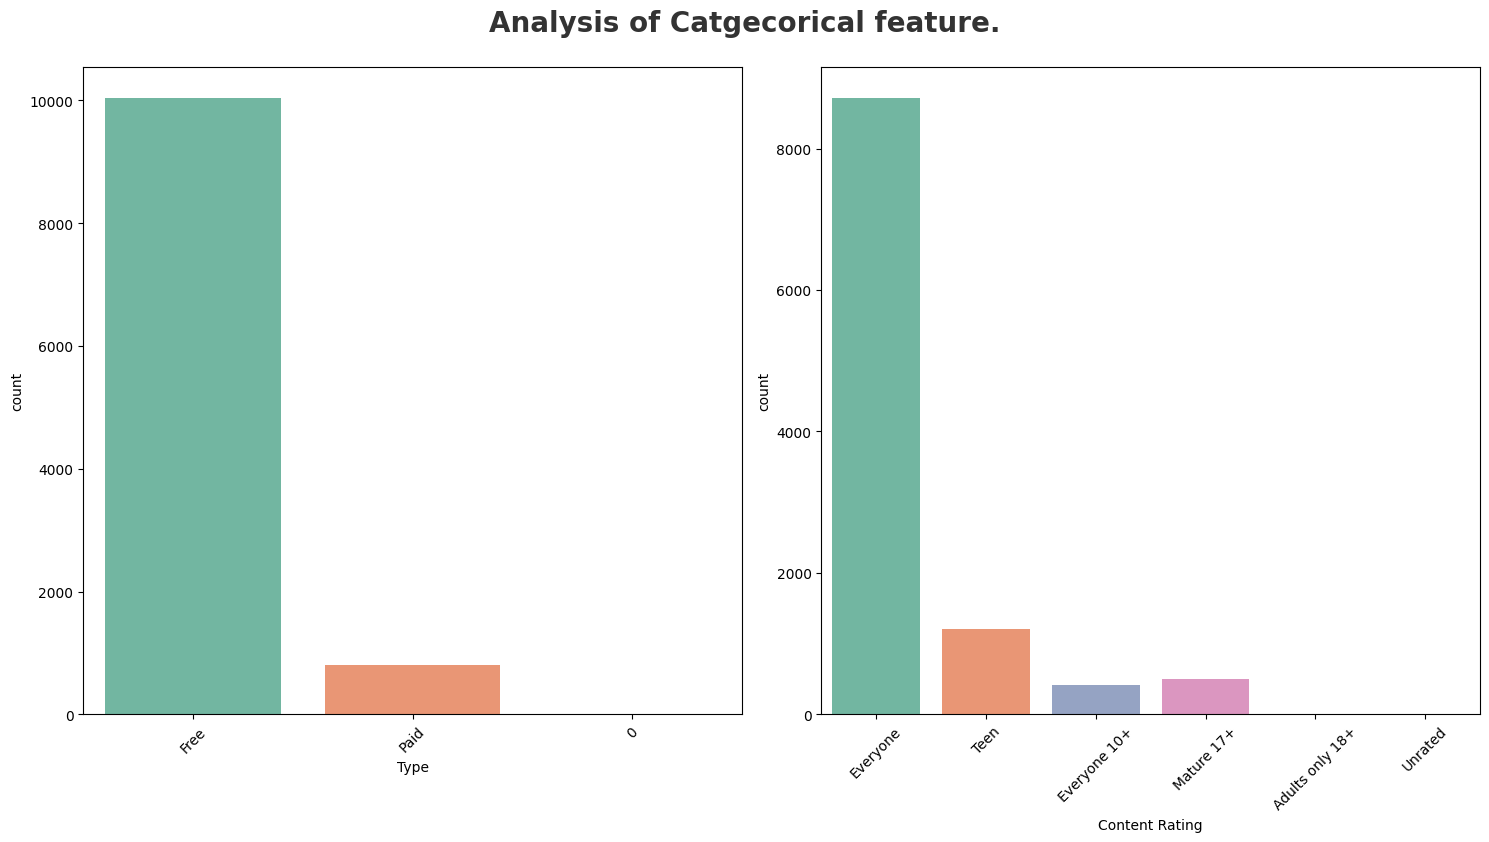

In [38]:
plt.figure(figsize=[15,15])
plt.suptitle("Analysis of Catgecorical feature.",fontsize=20,alpha=0.8,fontweight='bold',y=1)
category=['Type', 'Content Rating']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Which is the most popular app category??

<Axes: ylabel='count'>

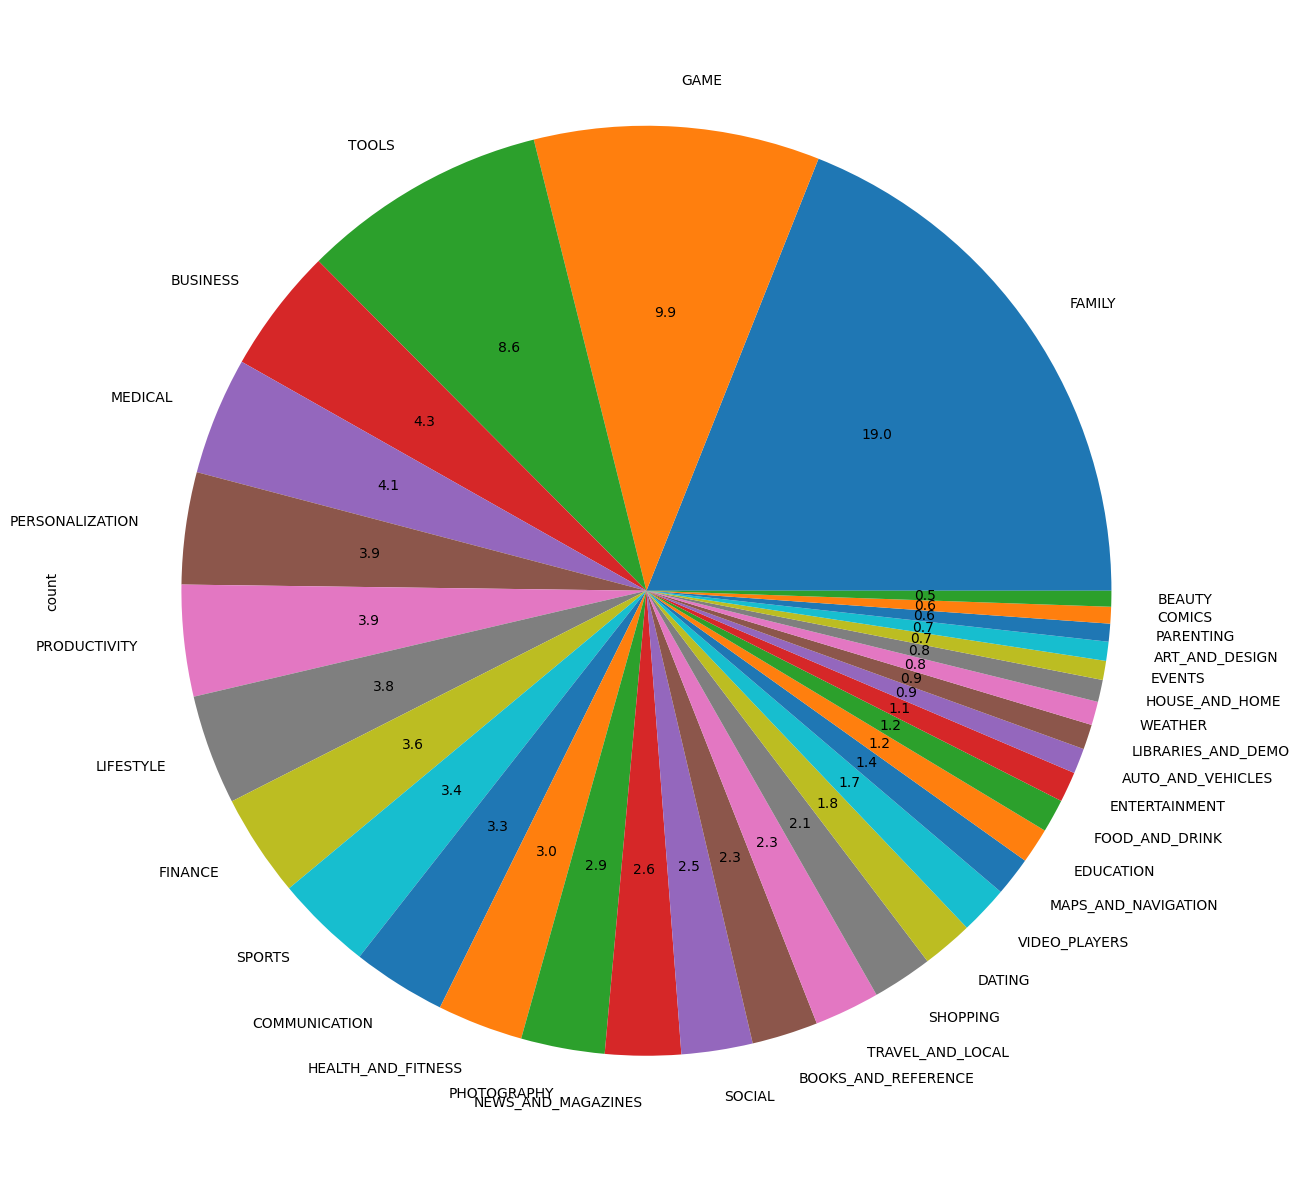

In [39]:
df_copy["Category"].value_counts().plot.pie(y=df_copy["Category"],figsize=(15,16),autopct="%1.1f")

In [40]:
category=pd.DataFrame(df_copy["Category"].value_counts())
category.rename(columns={"Category":"Counts"},inplace=True)

In [41]:
category


,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


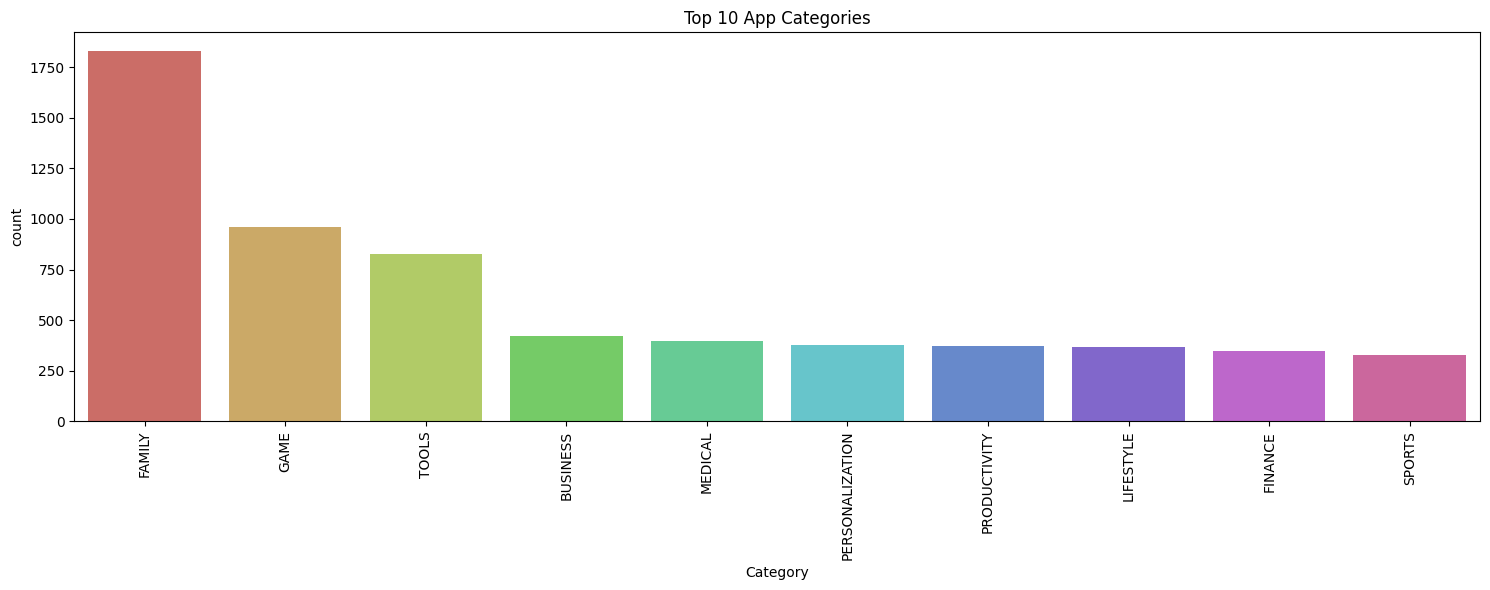

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10],y="count",data=category[:10],palette="hls")
plt.title("Top 10 App Categories")
plt.xticks(rotation=90)
plt.tight_layout()

## Which category is having largest number of installations??

Text(0, 0.5, 'Number of Installs (in billions)')

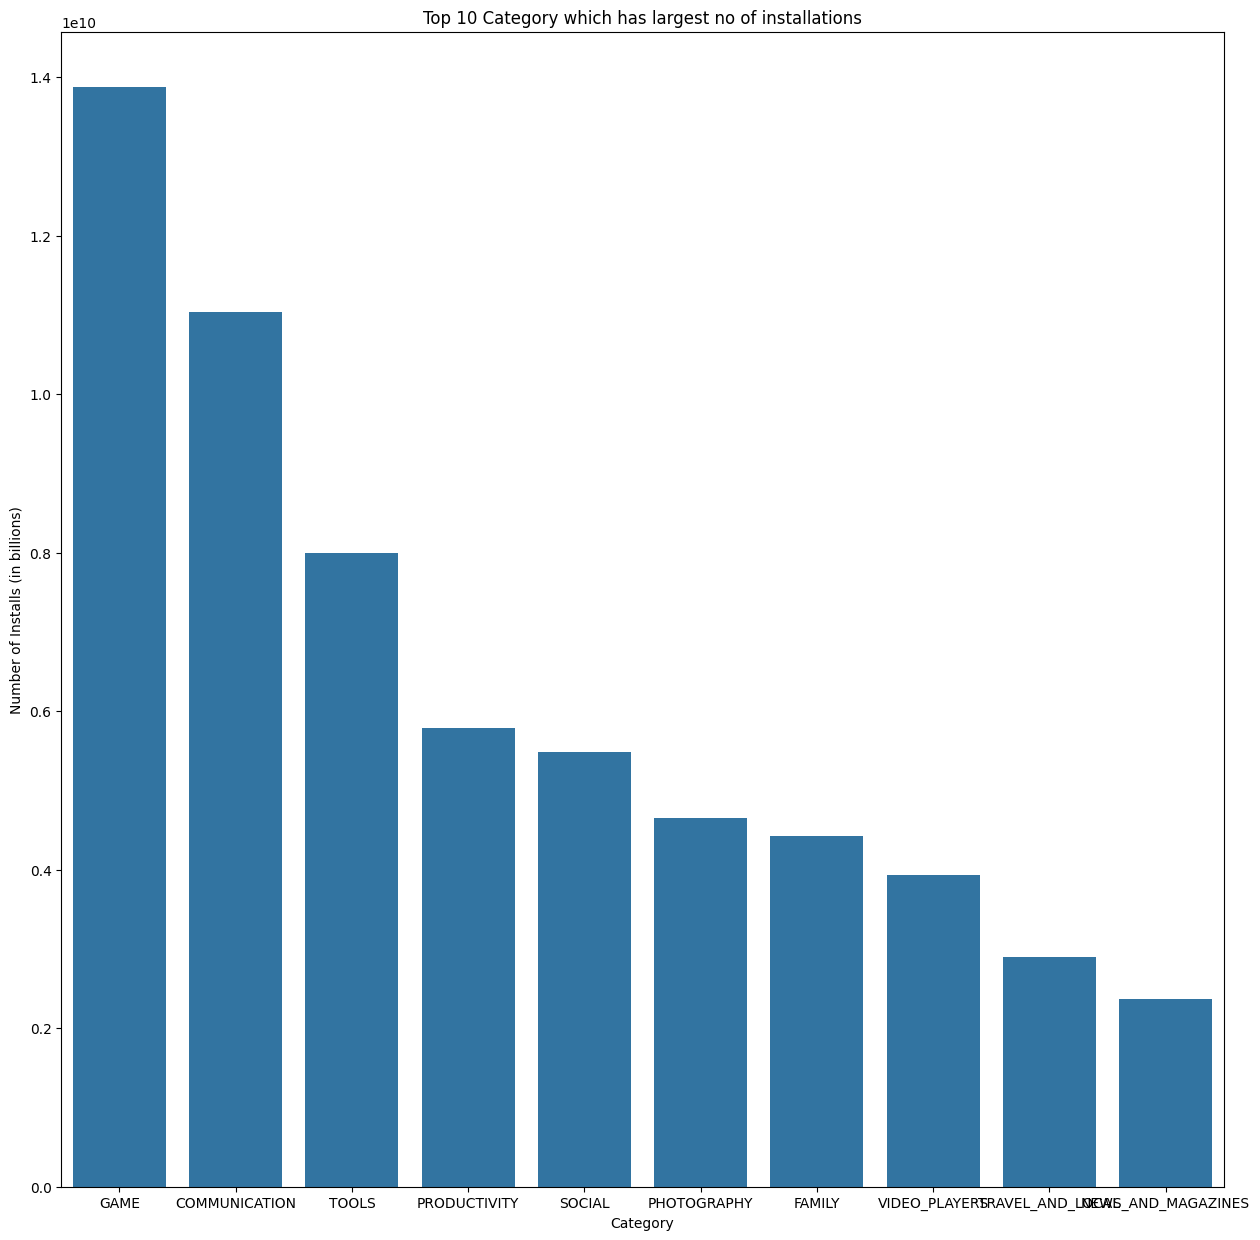

In [43]:
df_copy["Category"].value_counts()
## Its asking for - Categories having largest installations
category=df_copy.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,15))
sns.barplot(x=category.index,y=category.values)
plt.title("Top 10 Category which has largest no of installations")
plt.xlabel('Category')
plt.ylabel('Number of Installs (in billions)')

## Which category is havng highest number of apps??

In [44]:
category=df_copy["Category"].value_counts().head(10)
category=pd.Series(category)

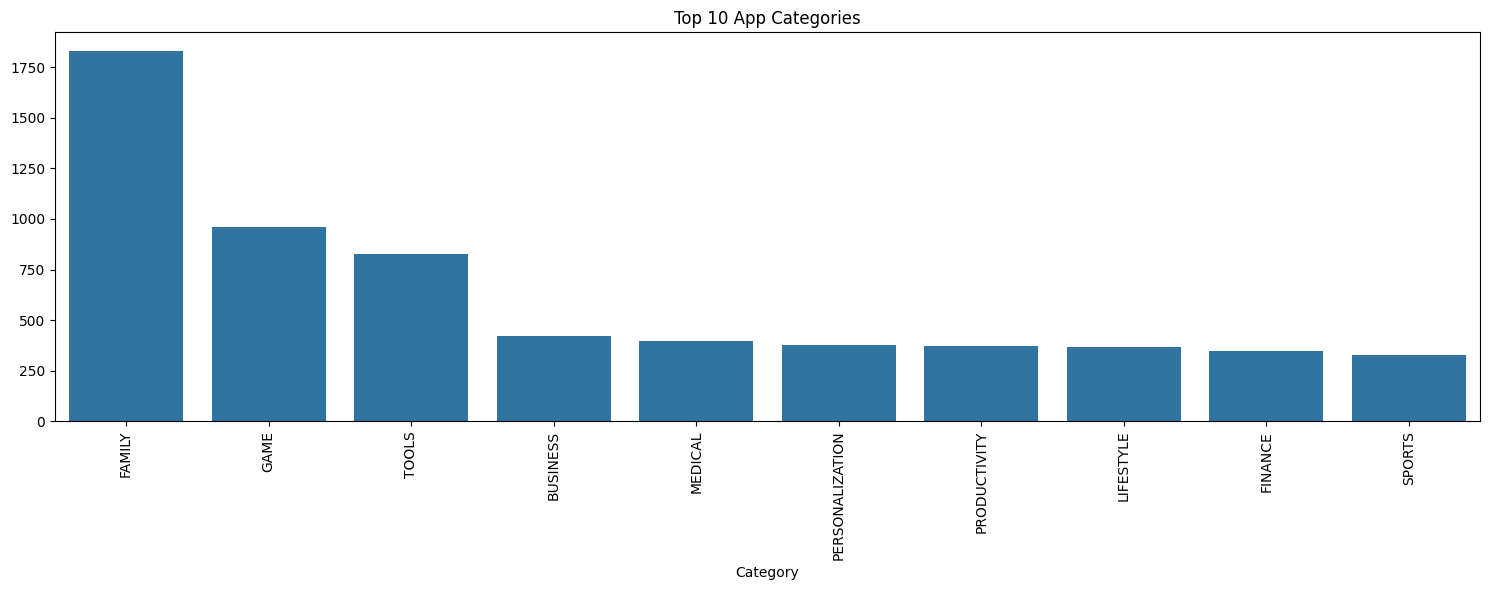

In [45]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index,y=category.values)
plt.title("Top 10 App Categories")
plt.xticks(rotation=90)
plt.tight_layout()

## No of Installs for Free,paid Apps

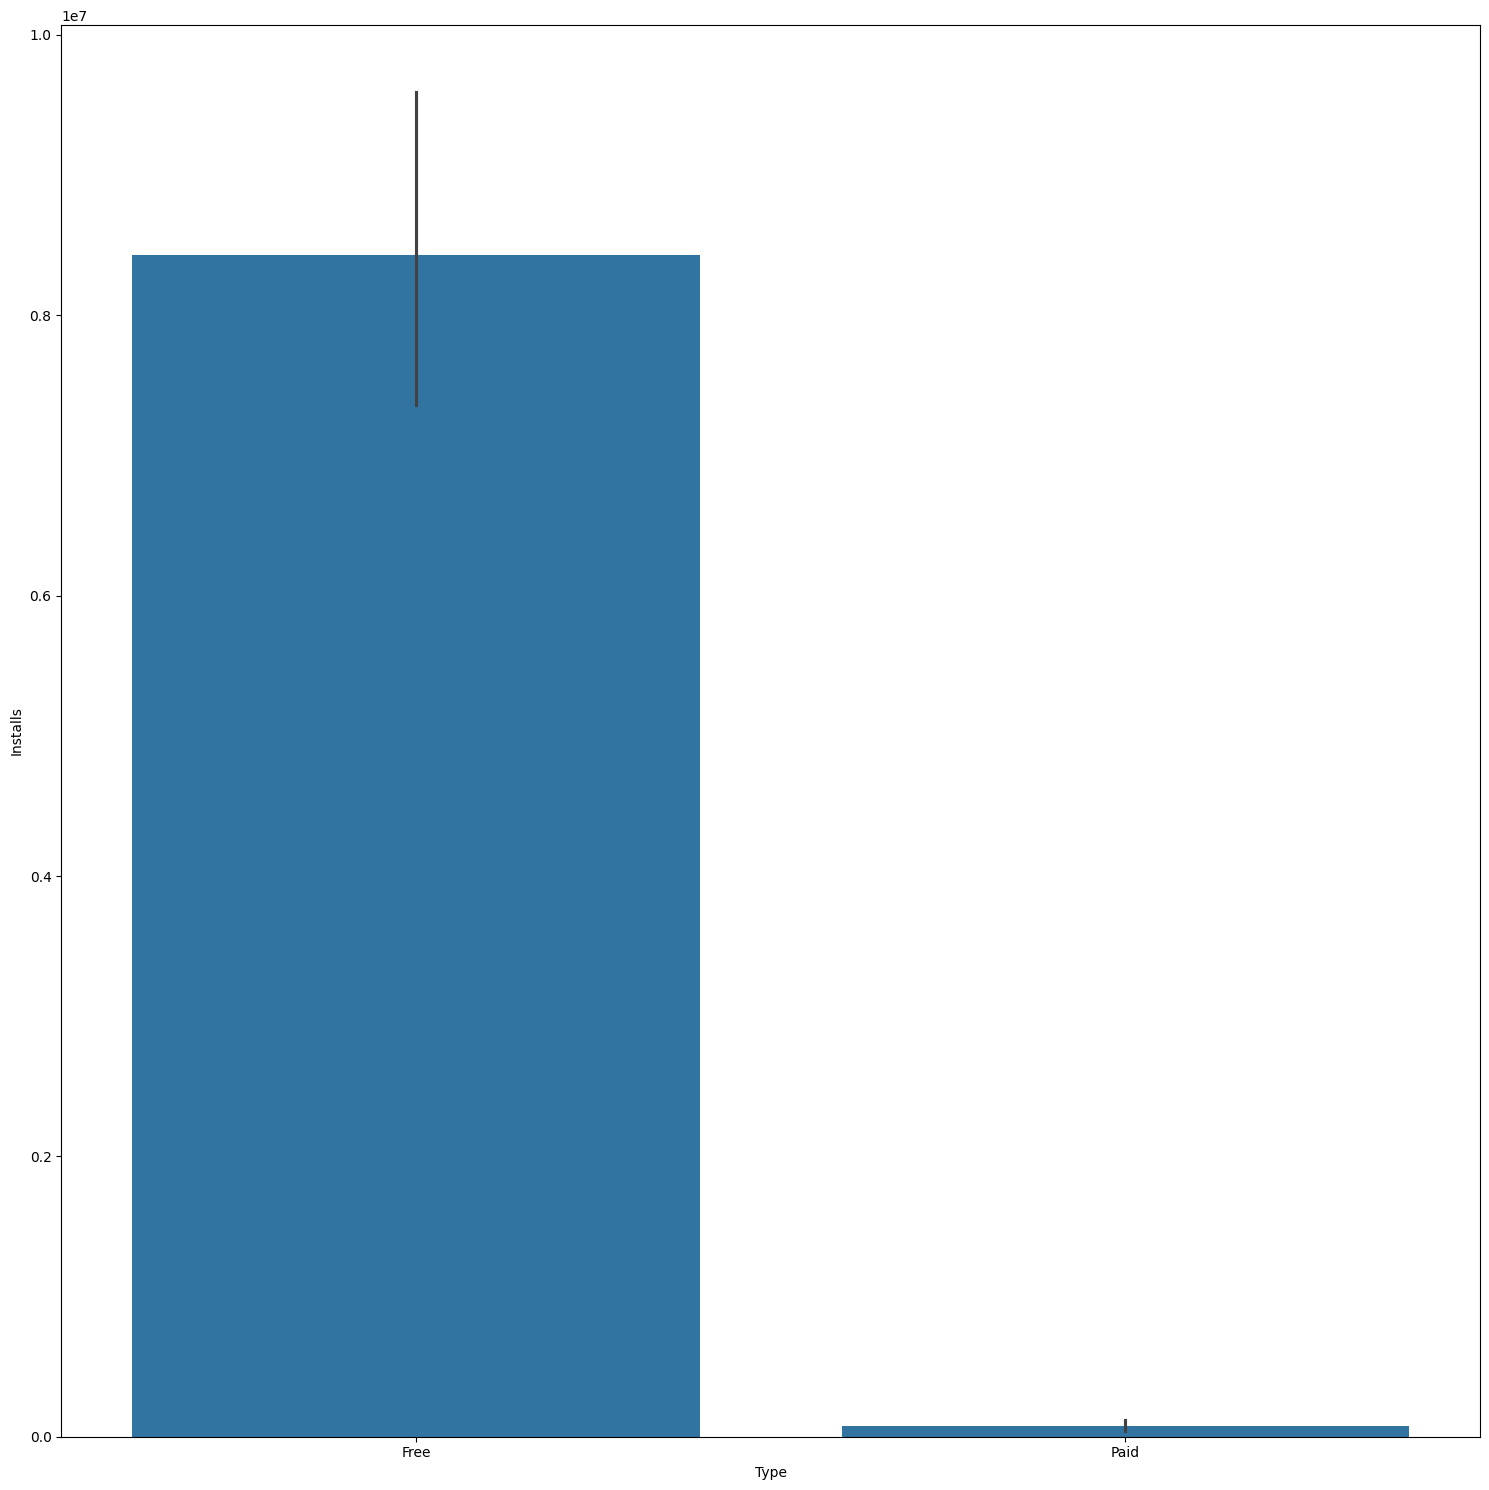

In [46]:
plt.figure(figsize=(15,15))
sns.barplot(x="Type",y="Installs",data=df_copy)
plt.tight_layout()

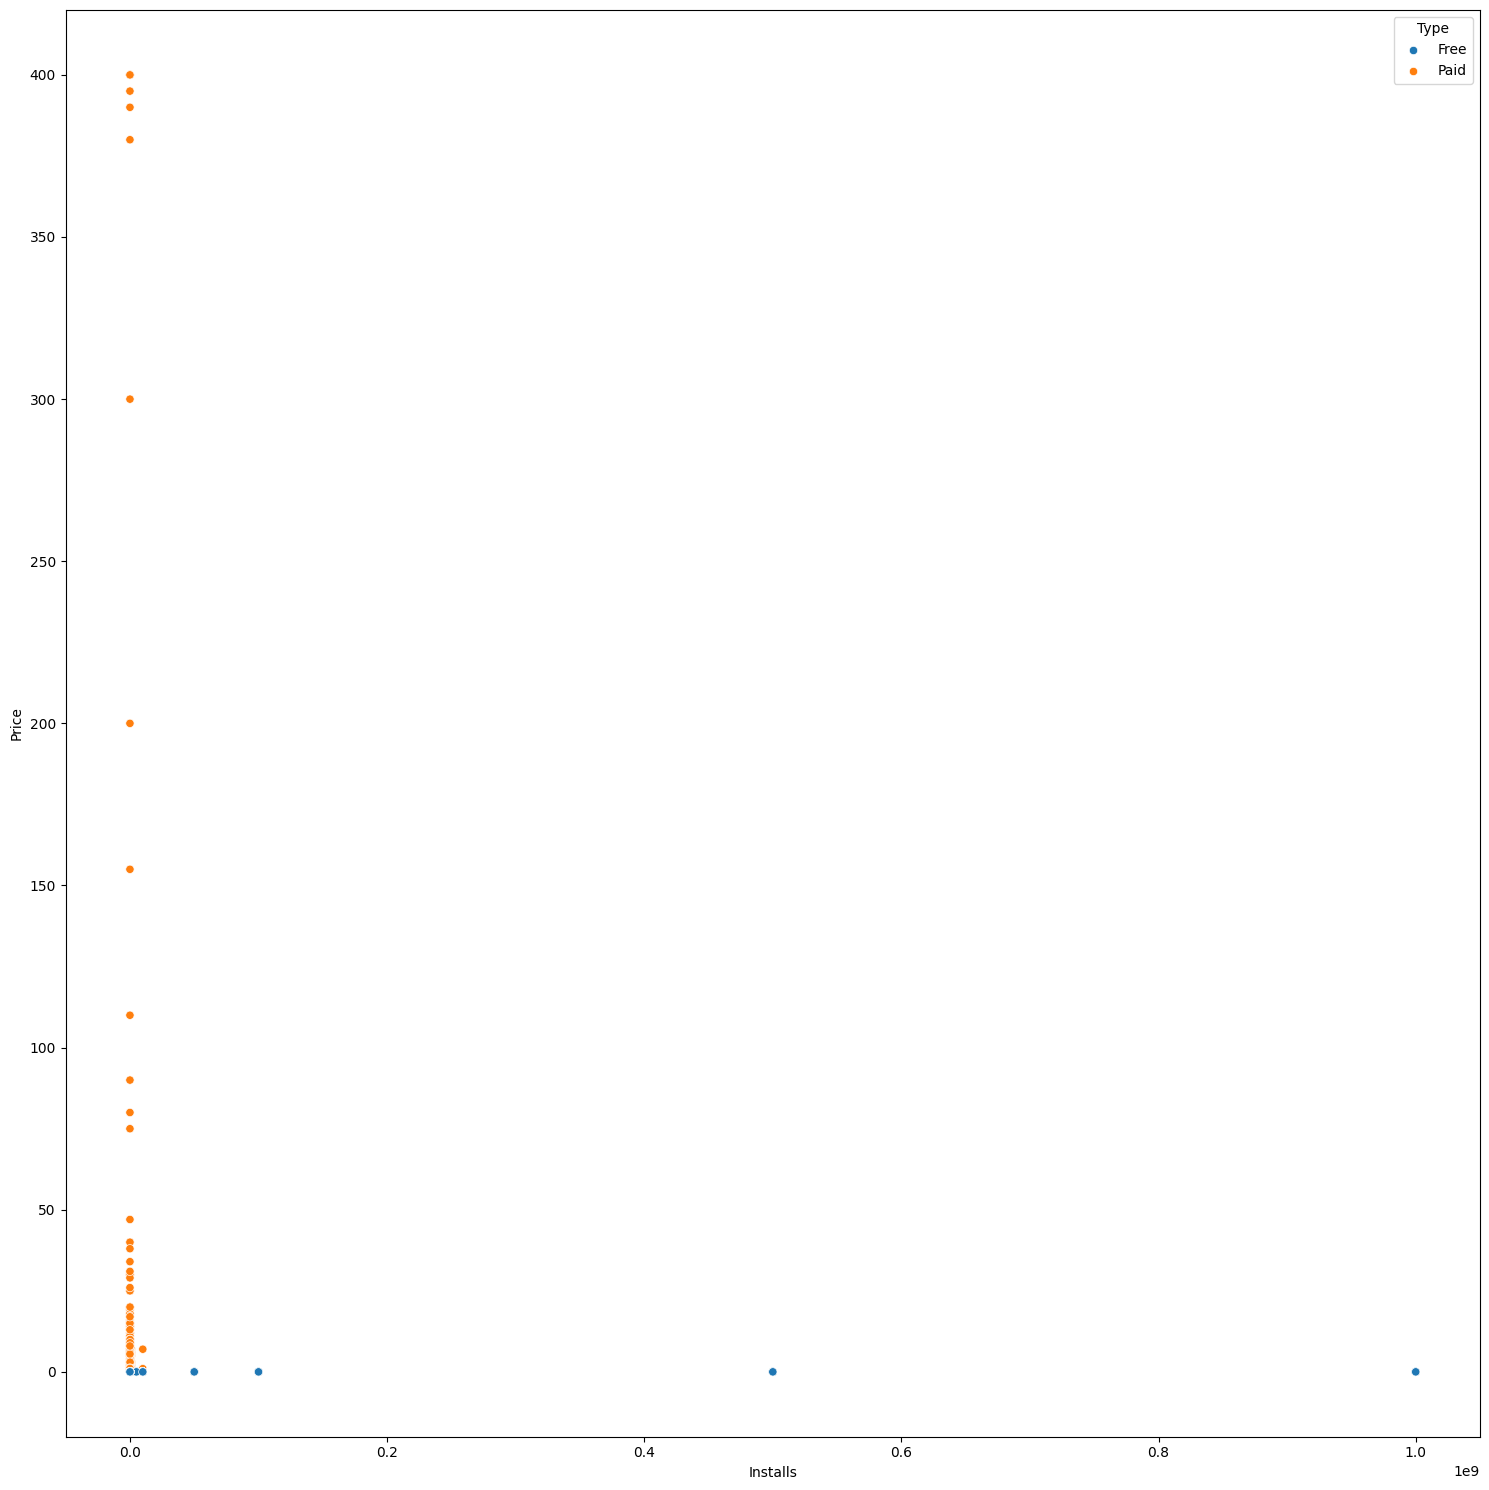

In [47]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="Installs",y="Price",hue="Type",data=df_copy)
plt.tight_layout()

## Find how many apps are there in Everyone content rating

In [48]:
df_copy.head(2)
everyone=df_copy[df_copy["Content Rating"]=="Everyone"].value_counts()
everyone=pd.Series(everyone)

In [49]:
data1=df_copy["Category"].loc[df_copy["Content Rating"]=="Everyone"].value_counts()

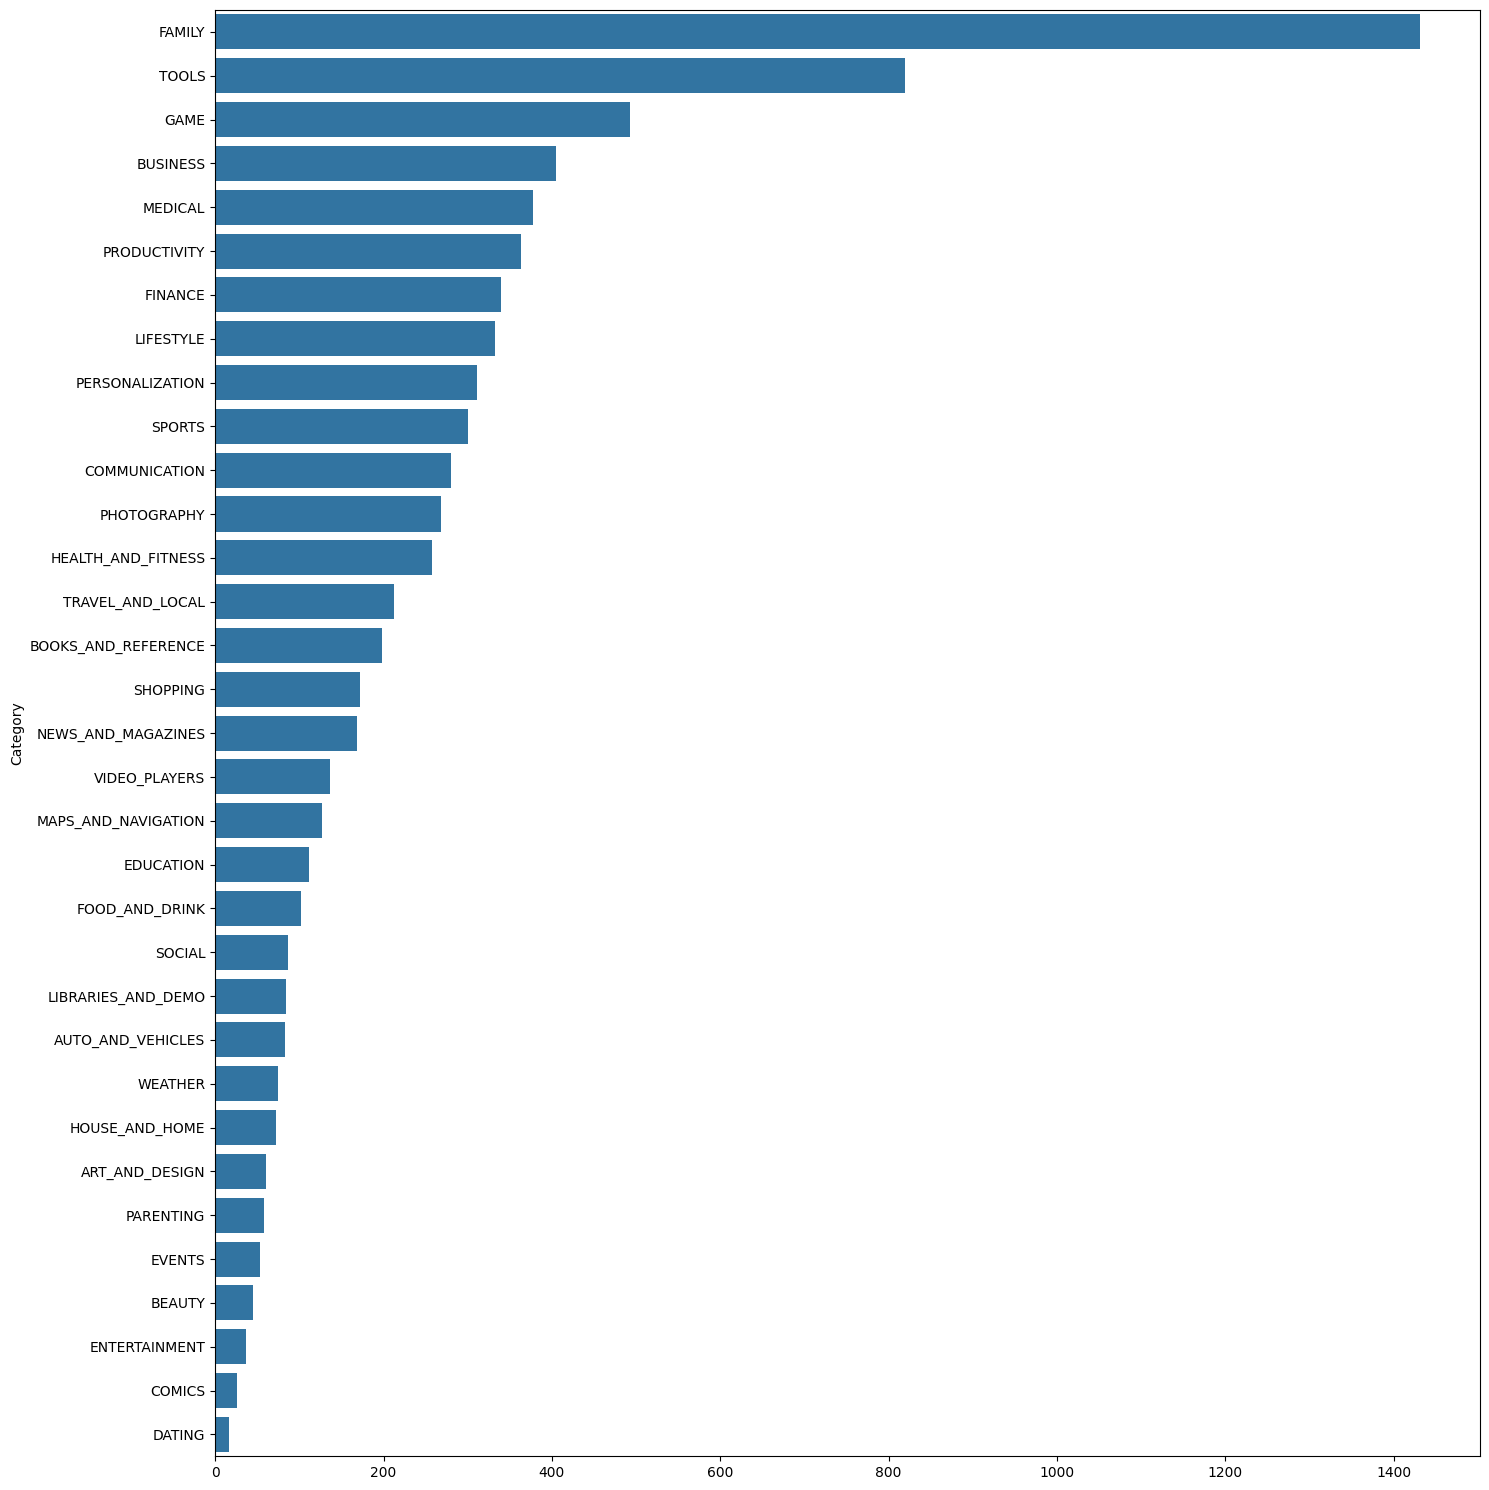

In [50]:
plt.figure(figsize=(15,15))
sns.barplot(x=data1.values,y=data1.index)
plt.tight_layout()

<Axes: xlabel='Content Rating', ylabel='Installs'>

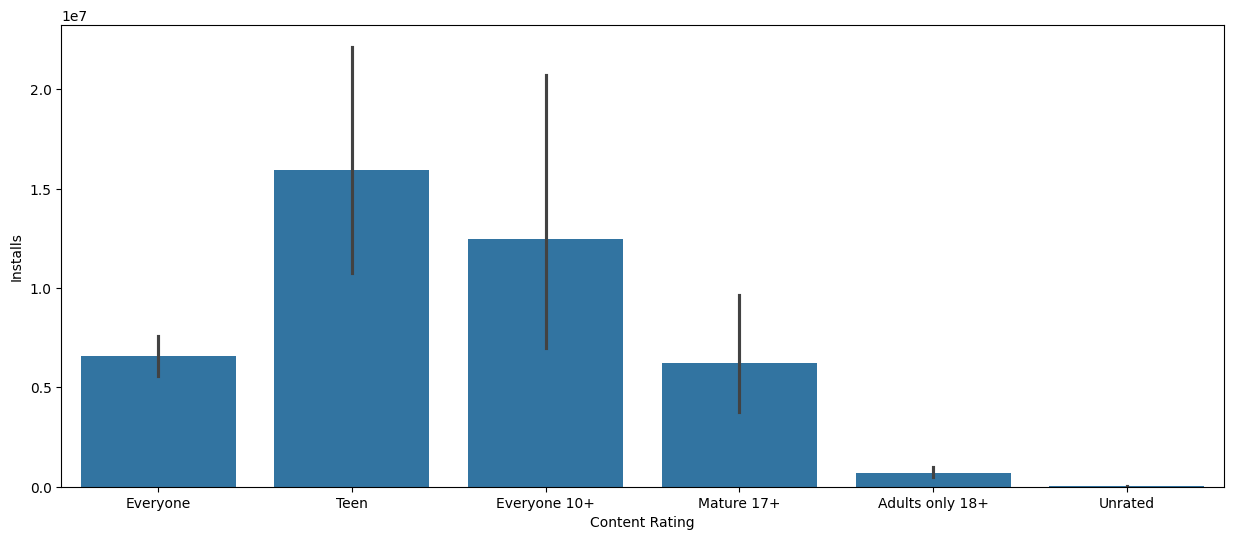

In [51]:
plt.figure(figsize=(15,6))
sns.barplot(x="Content Rating",y="Installs",data=df_copy)

## Top 5 free apps with highest number of Ratings

<Axes: xlabel='App', ylabel='Rating'>

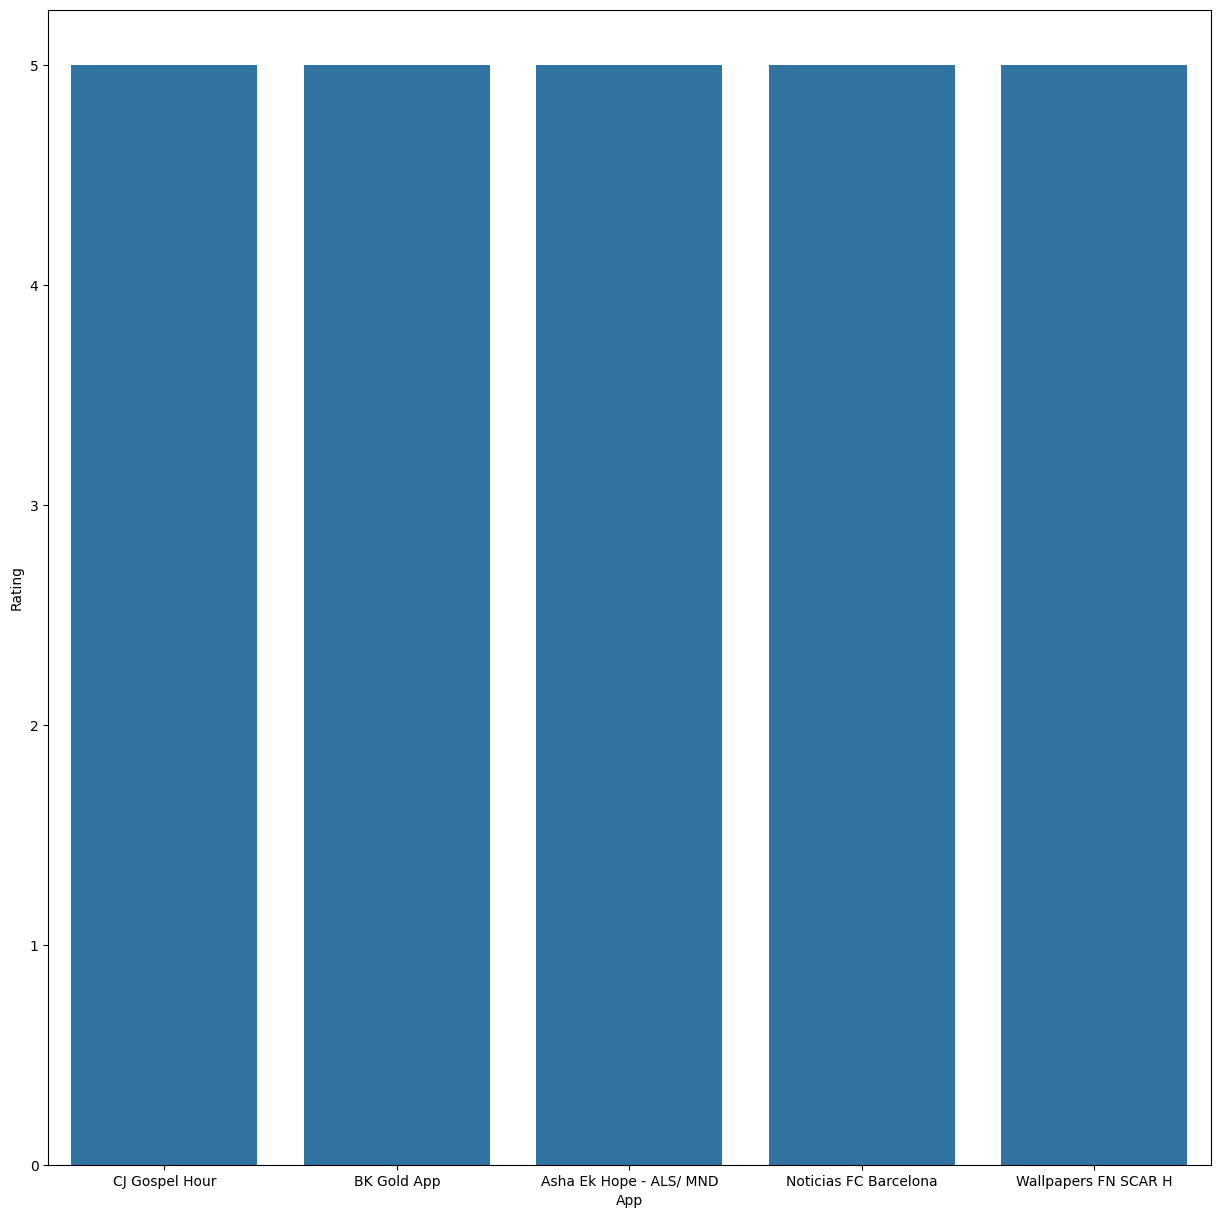

In [52]:
plt.figure(figsize=(15,15))
sns.barplot(x="App",y="Rating",data=df_copy[df_copy["Type"]=="Free"].sort_values(by="Rating",ascending=False).head(5))

In [53]:
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018


## Which Categories have highest number of reviews??

<Axes: xlabel='Category'>

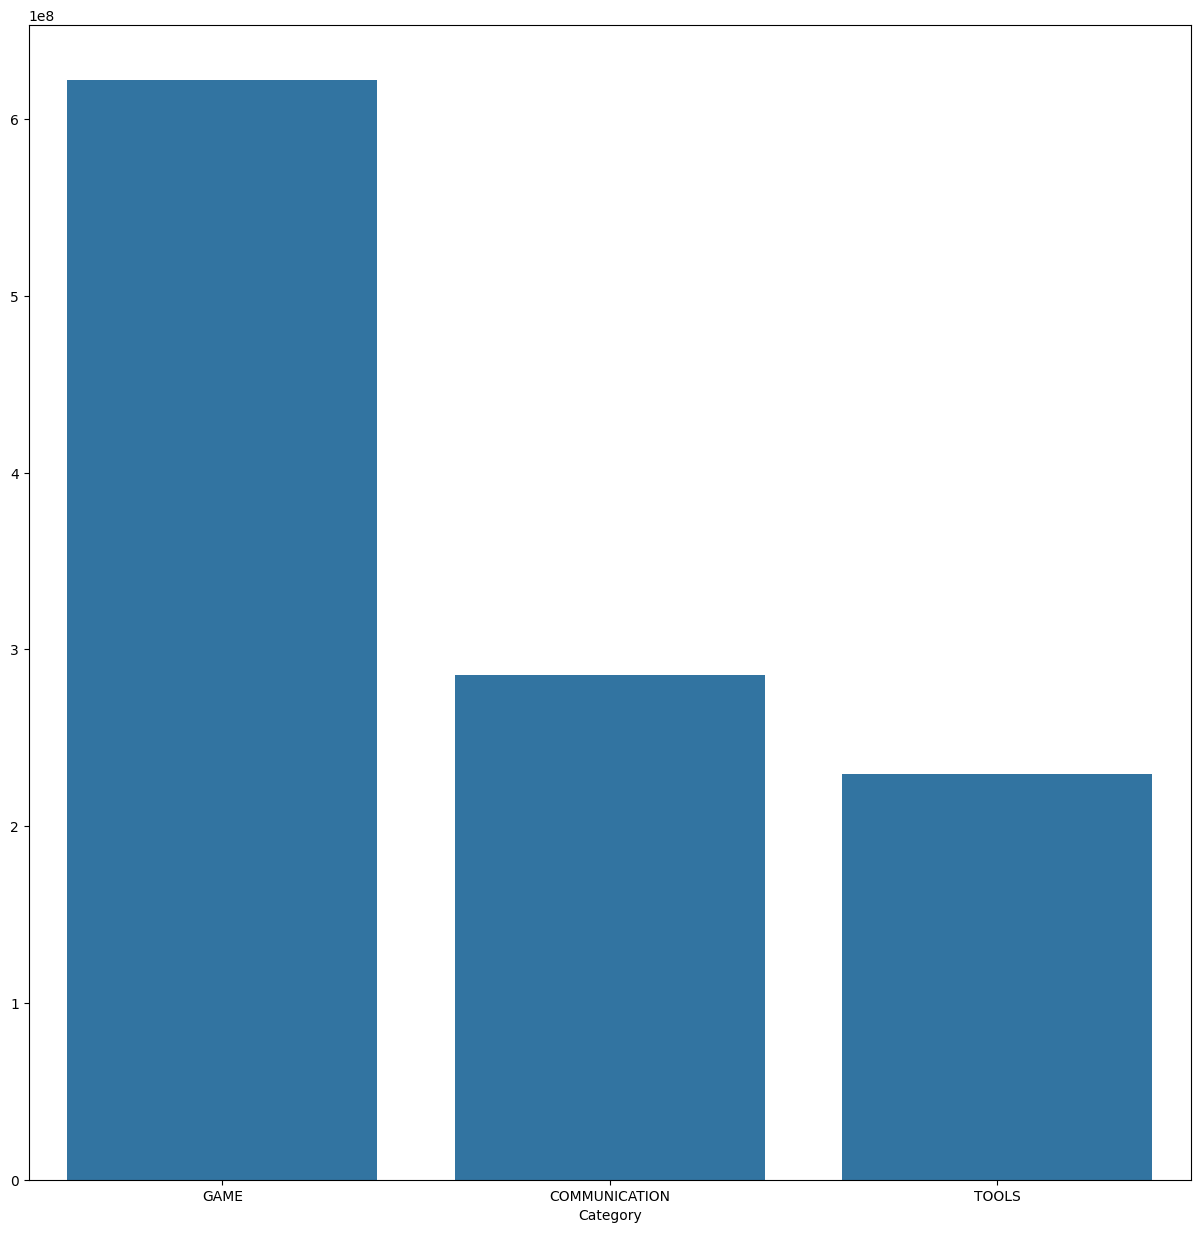

In [54]:
category=df_copy.groupby("Category")["Reviews"].sum().sort_values(ascending=False).head(3)
plt.figure(figsize=(15,15))
sns.barplot(x=category.index,y=category.values)

## Top 5 installed apps in each popular category

In [55]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [148]:
cat=df_copy.groupby('Category')["Installs"].sum().sort_values(ascending=False).head(5)
cat

Category
GAME             1.387892e+10
COMMUNICATION    1.103828e+10
TOOLS            8.001772e+09
PRODUCTIVITY     5.793091e+09
SOCIAL           5.487868e+09
Name: Installs, dtype: float64

In [120]:
df_copy["App"].value_counts().head(3)

App
Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
Name: count, dtype: int64

In [136]:
df_copy.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018


33

In [141]:
cat_installs = pd.DataFrame(df_copy.groupby("Category")['Installs'].sum()).reset_index()

In [145]:
cat_installs.sort_values(by='Installs',ascending=False, inplace=True)

In [152]:
top_cat = cat_installs['Category'].head().tolist()
top_cat

['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL']

These are the Top 5 categories with highest installs